# Calibration Plots

Classifications models output probablity values for different classes involved, but the credibility of these probablities need to be tested.

## What credibility means?

If my model states 80% probablity of a class A, then 80 out of 100 times, when the model predicts class A, in reality also it should also be class A.


Calibration plots provide a method to asses these credibility scores.

# Training Multiple Classification Models

In [1]:
# Data pre-processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv("../../../datasets/eeg.csv")

x_features = data.drop(["Class"], axis=1)
x_labels = data["Class"]

x_train, x_test, y_train, y_test = train_test_split(x_features, x_labels, test_size=0.3)

In [2]:
# Ignore warnings for better readibility
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Fitting LogisticRegression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
# Fitting SVC model
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [5]:
# Fitting RFC model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Plot Calibration Curves for all 3 Models

> A probabilistic model is calibrated if I binned the test samples based on their predicted probabilities, each bin’s true outcomes has a proportion close to the probabilities in the bin.

For each bin, the y-value is the proportion of true outcomes, and x-value is the mean predicted probability. Therefore, a well-calibrated model has a calibration curve that hugs the straight line y = x.

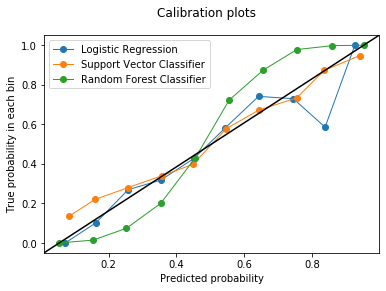

In [6]:
# Using function plot_calibration_curves in file calibration_plot to plot calibration curves
import calibration_plot as calibration_plot

calibration_plot.plot_calibration_curves(
    [logreg, svc, rfc],
    ["Logistic Regression", "Support Vector Classifier", "Random Forest Classifier"],
    x_test,
    y_test,
    10,
)

## Interpretation of Curve

As stated above, a well-calibrated model has a calibration curve that hugs the straight line y = x.
So, SVC is providing some of the most reliable probablities when p > 0.3. Similarly, logistic regression is also reliable in region 0.3 < p < 0.7. RFC predicts higher than actual probablities w